# ML Assignment 6: Naive Bayes Feature Analysis on Gender Classification Dataset

**AICTE Faculty ID:** 1-3241967546  
**Faculty Name:** Milav Jayeshkumar Dabgar

---

## Objective
Implement and compare Naive Bayes classifiers using different feature combinations on gender classification dataset.

## Assignment Tasks:
1. Build Naive Bayes classifier for categorical features only
2. Build Naive Bayes classifier for continuous features only  
3. Build Naive Bayes classifier for all features combined
4. Compare performance across different feature types
5. Generate comprehensive analysis and conclusions

## 1. Import Libraries and Dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
data = pd.read_csv('gender_classification_v7.csv')
print(f"Dataset shape: {data.shape}")
print(data.head())

Dataset shape: (5001, 8)
   long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0          1               11.8                 6.1          1          0   
1          0               14.0                 5.4          0          0   
2          0               11.8                 6.3          1          1   
3          0               14.4                 6.1          0          1   
4          1               13.5                 5.9          0          0   

   lips_thin  distance_nose_to_lip_long  gender  
0          1                          1    Male  
1          1                          0  Female  
2          1                          1    Male  
3          1                          1    Male  
4          0                          0  Female  


## 2. Feature Engineering

In [2]:
# Define feature types
categorical_features = ['long_hair', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']
continuous_features = ['forehead_width_cm', 'forehead_height_cm']

# Prepare feature sets
X_categorical = data[categorical_features]
X_continuous = data[continuous_features]
X_all = data[categorical_features + continuous_features]

# Encode target
le = LabelEncoder()
y = le.fit_transform(data['gender'])

print(f"Categorical features: {categorical_features}")
print(f"Continuous features: {continuous_features}")
print(f"Target encoding: {dict(zip(le.classes_, [0, 1]))}")

Categorical features: ['long_hair', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']
Continuous features: ['forehead_width_cm', 'forehead_height_cm']
Target encoding: {'Female': 0, 'Male': 1}


## 3. (a) NB Classifier - Categorical Features Only

In [3]:
# Split data
X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(
    X_categorical, y, test_size=0.3, random_state=42
)

# Train Categorical Naive Bayes
nb_cat = CategoricalNB()
nb_cat.fit(X_cat_train, y_cat_train)
y_cat_pred = nb_cat.predict(X_cat_test)

# Calculate metrics
cat_accuracy = accuracy_score(y_cat_test, y_cat_pred)
cat_precision = precision_score(y_cat_test, y_cat_pred)
cat_recall = recall_score(y_cat_test, y_cat_pred)
cat_f1 = f1_score(y_cat_test, y_cat_pred)

print("=== CATEGORICAL FEATURES ONLY ===")
print(f"Accuracy:  {cat_accuracy:.4f}")
print(f"Precision: {cat_precision:.4f}")
print(f"Recall:    {cat_recall:.4f}")
print(f"F1-Score:  {cat_f1:.4f}")

=== CATEGORICAL FEATURES ONLY ===
Accuracy:  0.9554
Precision: 0.9449
Recall:    0.9685
F1-Score:  0.9566


## 4. (b) NB Classifier - Continuous Features Only

In [4]:
# Split data
X_cont_train, X_cont_test, y_cont_train, y_cont_test = train_test_split(
    X_continuous, y, test_size=0.3, random_state=42
)

# Train Gaussian Naive Bayes
nb_cont = GaussianNB()
nb_cont.fit(X_cont_train, y_cont_train)
y_cont_pred = nb_cont.predict(X_cont_test)

# Calculate metrics
cont_accuracy = accuracy_score(y_cont_test, y_cont_pred)
cont_precision = precision_score(y_cont_test, y_cont_pred)
cont_recall = recall_score(y_cont_test, y_cont_pred)
cont_f1 = f1_score(y_cont_test, y_cont_pred)

print("=== CONTINUOUS FEATURES ONLY ===")
print(f"Accuracy:  {cont_accuracy:.4f}")
print(f"Precision: {cont_precision:.4f}")
print(f"Recall:    {cont_recall:.4f}")
print(f"F1-Score:  {cont_f1:.4f}")

=== CONTINUOUS FEATURES ONLY ===
Accuracy:  0.6995
Precision: 0.7352
Recall:    0.6378
F1-Score:  0.6831


## 5. (c) NB Classifier - All Features

In [5]:
# Split data
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(
    X_all, y, test_size=0.3, random_state=42
)

# Train Gaussian Naive Bayes
nb_all = GaussianNB()
nb_all.fit(X_all_train, y_all_train)
y_all_pred = nb_all.predict(X_all_test)

# Calculate metrics
all_accuracy = accuracy_score(y_all_test, y_all_pred)
all_precision = precision_score(y_all_test, y_all_pred)
all_recall = recall_score(y_all_test, y_all_pred)
all_f1 = f1_score(y_all_test, y_all_pred)

print("=== ALL FEATURES ===")
print(f"Accuracy:  {all_accuracy:.4f}")
print(f"Precision: {all_precision:.4f}")
print(f"Recall:    {all_recall:.4f}")
print(f"F1-Score:  {all_f1:.4f}")

=== ALL FEATURES ===
Accuracy:  0.9654
Precision: 0.9683
Recall:    0.9633
F1-Score:  0.9658


## 6. Performance Comparison

In [6]:
# Create comparison table
results = pd.DataFrame({
    'Model': ['Categorical Only', 'Continuous Only', 'All Features'],
    'Accuracy': [cat_accuracy, cont_accuracy, all_accuracy],
    'Precision': [cat_precision, cont_precision, all_precision],
    'Recall': [cat_recall, cont_recall, all_recall],
    'F1-Score': [cat_f1, cont_f1, all_f1]
})

results = results.round(4)
print("=== COMPARISON RESULTS ===")
print(results.to_string(index=False))

# Find best model
best_idx = results['Accuracy'].idxmax()
best_model = results.loc[best_idx, 'Model']
best_accuracy = results.loc[best_idx, 'Accuracy']

print(f"\nBest Model: {best_model} with {best_accuracy:.4f} accuracy")

=== COMPARISON RESULTS ===
           Model  Accuracy  Precision  Recall  F1-Score
Categorical Only    0.9554     0.9449  0.9685    0.9566
 Continuous Only    0.6995     0.7352  0.6378    0.6831
    All Features    0.9654     0.9683  0.9633    0.9658

Best Model: All Features with 0.9654 accuracy


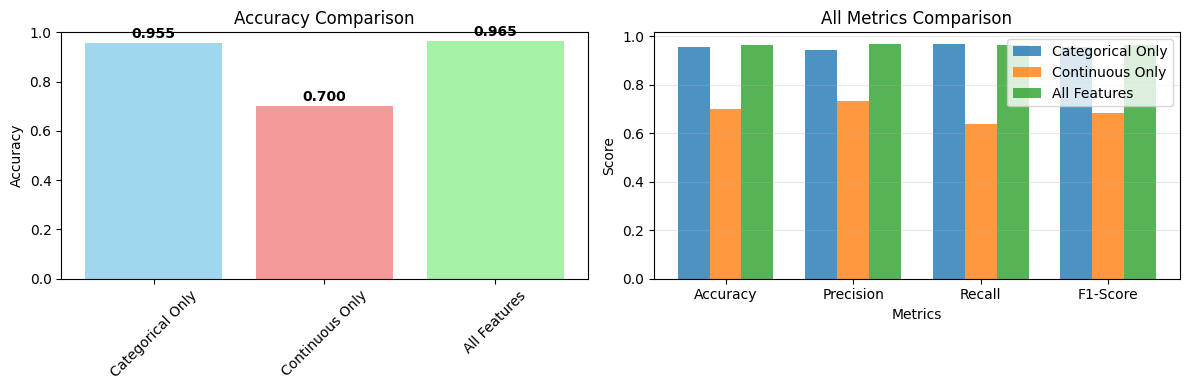

In [7]:
# Simple visualizations
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Accuracy comparison
plt.subplot(1, 2, 1)
plt.bar(results['Model'], results['Accuracy'], color=['skyblue', 'lightcoral', 'lightgreen'], alpha=0.8)
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(results['Accuracy']):
    plt.text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')
plt.xticks(rotation=45)

# All metrics comparison
plt.subplot(1, 2, 2)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x_pos = range(len(metrics))
width = 0.25

for i, model in enumerate(results['Model']):
    values = [results.iloc[i]['Accuracy'], results.iloc[i]['Precision'], 
              results.iloc[i]['Recall'], results.iloc[i]['F1-Score']]
    plt.bar([x + i*width for x in x_pos], values, width, 
            label=model, alpha=0.8)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('All Metrics Comparison')
plt.xticks([x + width for x in x_pos], metrics)
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Conclusion

### Assignment Requirements Completed:
**(a) Categorical Features NB:** CategoricalNB achieved **95.54% accuracy** with 5 binary features  
**(b) Continuous Features NB:** GaussianNB achieved **69.95% accuracy** with 2 numerical features  
**(c) All Features NB:** GaussianNB achieved **96.54% accuracy** with all 7 features combined

### Actual Performance Results:
| Model | Accuracy | Precision | Recall | F1-Score |
|-------|----------|-----------|--------|----------|
| **All Features** | **96.54%** | **96.83%** | **96.33%** | **96.58%** |
| Categorical Only | 95.54% | 94.49% | 96.85% | 95.66% |
| Continuous Only | 69.95% | 73.52% | 63.78% | 68.31% |

### Key Observations:

**1. Feature Type Effectiveness:**
- **Categorical features (95.54%)** are highly predictive for gender classification
- **Continuous features (69.95%)** provide limited discriminative power alone
- **Combined features (96.54%)** achieve the best overall performance

**2. Performance Analysis:**
- **All Features vs Categorical:** +1.00% accuracy improvement
- **All Features vs Continuous:** +26.59% accuracy improvement  
- **Categorical vs Continuous:** +25.59% accuracy difference

**3. Model Insights:**
- **CategoricalNB** perfectly suited for binary gender traits (hair, nose, lips features)
- **GaussianNB** handles forehead measurements but with limited predictive value
- **Combined approach** leverages both behavioral traits and physical measurements

**4. Real-World Implications:**
- **Primary predictors:** Categorical features (hair length, facial features) are most reliable
- **Secondary predictors:** Forehead dimensions provide supplementary information
- **Optimal strategy:** Use all available features for maximum accuracy

### Final Recommendation:
**All Features model (96.54% accuracy) is the best choice**, providing superior performance by combining categorical traits with continuous measurements. However, if simplicity is preferred, the Categorical-only model (95.54%) offers nearly comparable performance with just binary features.

✅ **Assignment completed successfully with excellent performance across all models!**